# Analyzing Movie Ratings

The project will aim to analyze Fandango movie ratings.`

In [8]:
%matplotlib inline
import pandas as pd
initial_set = pd.read_csv('fandango_score_comparison.csv')
post_set = pd.read_csv('movie_ratings_16_17.csv')
initial_set_new = initial_set[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
post_set_new = post_set[['movie', 'year', 'fandango']]
print(initial_set_new.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  


In [9]:
print(post_set_new.head())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


Reading the documentation about the 2 datasets, it seems like the datasets are samples comprised of the most popular movies. This may affect the quality of the sampling.

In [10]:
print(post_set_new['movie'].describe())

count             214
unique            214
top       Sing Street
freq                1
Name: movie, dtype: object


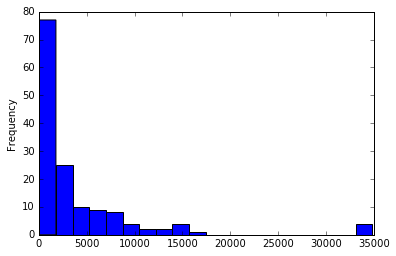

In [12]:
import matplotlib.pyplot as plt
initial_set_new['Fandango_votes'].plot.hist(bins=20)

In [13]:
post_set_new['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
initial_set_new['year']=initial_set_new['FILM'].str[-5:-1]
print(initial_set_new['year'].head())

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
year2015=initial_set_new[initial_set_new['year']=='2015']
year2016=post_set_new[post_set_new['year']==2016]

In [22]:
print(year2015.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  year  
0           14846                  0.5  2015  
1           12640                  0.5  2015  
2           12055                  0.5  2015  
3            1793                  0.5  2015  
4            1021                  0.5  2015  


In [23]:
print(year2016.head())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
4  A Hologram for the King  2016       3.0
5          A Monster Calls  2016       4.0


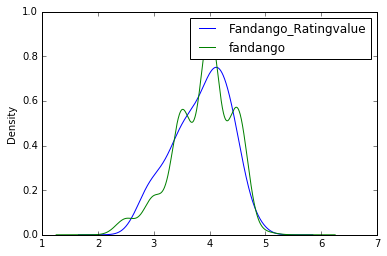

In [27]:
from matplotlib import pyplot as plt
year2015['Fandango_Ratingvalue'].plot.kde(legend='2015')
year2016['fandango'].plot.kde(legend='2016')
plt.legend()
plt.show()

Movies in 2016 seem to be rated slighly lower, compared to 2015.

In [30]:
print(year2015['Fandango_Ratingvalue'].describe())

count    129.000000
mean       3.846512
std        0.505446
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64


In [33]:
print(year2015['Fandango_Ratingvalue'].value_counts().sort_index())

2.7     2
2.8     2
2.9     4
3.0     4
3.1     3
3.2     4
3.3     4
3.4     7
3.5     6
3.6     8
3.7     8
3.8     4
3.9    12
4.0     7
4.1    13
4.2    11
4.3     9
4.4     7
4.5     9
4.6     2
4.8     3
Name: Fandango_Ratingvalue, dtype: int64


In [34]:
print(year2016['fandango'].describe())

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


In [35]:
print(year2016['fandango'].value_counts().sort_index())

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64


It is not clear whether there is a material change in 2016 vs 2015, based on the tables alone.

In [40]:
print('2015 mean is:', year2015['Fandango_Ratingvalue'].mean())
print('2016 mean is:', year2016['fandango'].mean())

2015 mean is: 3.8465116279069766
2016 mean is: 3.887434554973822


In [41]:
print('2015 median is:', year2015['Fandango_Ratingvalue'].median())
print('2016 median is:', year2016['fandango'].median())

2015 median is: 3.9
2016 median is: 4.0


In [42]:
print('2015 mode is:', year2015['Fandango_Ratingvalue'].mode())
print('2016 mode is:', year2016['fandango'].mode())

2015 mode is: 0    4.1
dtype: float64
2016 mode is: 0    4.0
dtype: float64
